In [51]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd 'gdrive/MyDrive/Colab Notebooks/Librairiee_5/'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-9394fd86d428>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', "'gdrive/MyDrive/Colab Notebooks/Librairiee_5/'")
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packag

**EXPLORATION ET NETTOYAGE DES DONNEES**

Notre mission ici est pour LAPAGE est d'analyser les forces , les faiblesses et les comportements des clients de LAPAGE.
il nous ai aussi demandé d'analyser la relation entre le sexe et les catégories de  livres achetés, puis le lien entre l'ages et le montant total des achats , la frequences des achats et la taille moyenne du panier et les catégories de livres achétés.



1.   explorer et nettoyer les donnees de
- clients,
-product,
-et transactions
2.   fusioner les dataframe LAPAGE, explorer et fusioner
3. conclusion (partie 1)




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings

**1. customers.csv : exploration et nettoyage**

In [4]:
#charger les données
customers = pd.read_csv('customers.csv')

In [5]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [6]:
#nbre de ligne et de colones
customers.shape

(8623, 3)

In [7]:
# information sur le jeux de donnees
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [8]:
# recherche des valeur manquantes et dupliqués

#valeurs manquentes
def check_nan(data, column):
    if len(data[data[column].isnull()]) == 0:
        print ("La colone", column, "ne contient pas de valeur manquante")
    else :
        print("La colone", column, "contient ", len(data[data[column].isnull()]), " valeurs manquantes")

In [9]:
#valeurs dupliquées
#Check duplicates function :
def check_duplicates(data, column):
    n = len(data.index)
    if len(data[column].drop_duplicates()) == n :
        print ("La colone", column, "dne contient pas de valeur dupliquées")
    else :
        print("La colone", column, "contient ", len(data[data[column].duplicated()]), " dupliquées.")
        return data[data[column].duplicated()]

In [10]:
#recherche des valeur manquantes et dupliqués
check_nan(customers, "client_id")
check_duplicates(customers, "client_id")

La colone client_id ne contient pas de valeur manquante
La colone client_id dne contient pas de valeur dupliquées


Note:


*   les donees client(Customers) renseignent les clients LAPAGE sur leur Identifiant(clé primaire), leur sexe et leur annees de Naissance
*   il ya 8623 clients en ligne au cours des 2 dernieres annees


*   le fichiers de donnees ne contient pas de valeurs manquante ni de valeurs dupliquées
*  la cle primaire client_id commence par c_xx





In [11]:
# verifications des id de clients
#Plus précisément, elle sélectionne les lignes du DataFrame "customers" pour lesquelles la valeur de la colonne "client_id" ne commence pas par "c_". L'opérateur tilde (~) est utilisé pour effectuer la négation logique, donc "~customers["client_id"].str.startswith("c_")" renvoie un masque booléen qui est True pour les lignes ne satisfaisant pas la condition.
#En d'autres termes, cette ligne de code filtre les clients dont l'identifiant ne commence pas par "c_".
customers[~customers["client_id"].str.startswith("c_")]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001




*   ici les clients ct_0 et ct_1 ont un format differents des autres



In [12]:
# Ajoutons une nouvelle colone
customers['age'] = dt.date.today().year - customers['birth']
customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,56
1,c_7839,f,1975,48
2,c_1699,f,1984,39
3,c_5961,f,1962,61
4,c_5320,m,1943,80


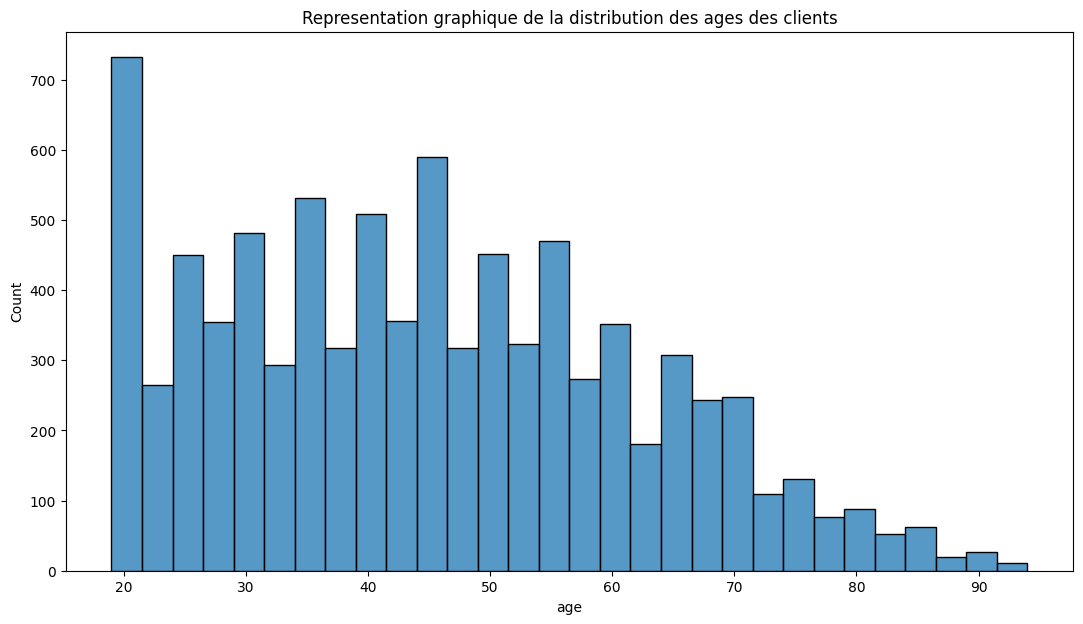

Age min: 19
Age max: 94


In [13]:
# distribution des ages des clients
plt.figure(figsize=(13,7))
sns.histplot(customers["age"])
plt.title("Representation graphique de la distribution des ages des clients")
#plt.savefig("Part1.Representation graphique de la distribution des ages des clients.png", bbox_inches='tight')
plt.show()

print("Age min:",customers["age"].min())
print("Age max:",customers["age"].max())




*   L'ages des clients est compris entre 19 et 94 ans
*   l'age  de 19 ans est surement lié à lié à l'age minimum pour creer un compte sur la boutique en ligne LAPAGE;


*  Le nbre de jeune de 19ans est tres eleves par rapport aux autres






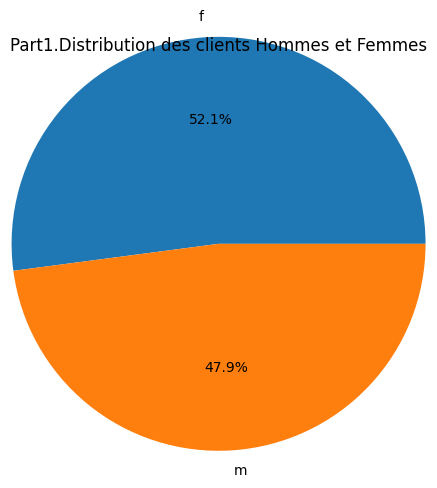

In [14]:
# Repartition client Homme Femme
customers["sex"].value_counts().plot(kind="pie", autopct='%.1f%%', ylabel='', radius=1.4)
plt.title("Part1.Distribution des clients Hommes et Femmes")
plt.show()



*   il ya plus de femmes que d'hommes




**2. products.csv : exploration et nettoyage**

In [15]:
# chargement de donnees
products = pd.read_csv('products.csv')

In [16]:
products.head()


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [18]:
#nbre de colones
products.shape

(3287, 3)

In [19]:
#info
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [20]:
#rechercher les valeurs manquantes et dupliquees
check_nan(products, "id_prod")
check_duplicates(products,"id_prod")

La colone id_prod ne contient pas de valeur manquante
La colone id_prod dne contient pas de valeur dupliquées


Note:


*   Les données sur les produits Lapage leur id(clé primaire), prix(sont les seuls données quantitative dans ce df) et categories

*   il 3287 produits
*   les fichiers ne contient pas de valeurs manquante ni de doublons


*   la cle primaire "id_prod" commence par "categ_xxx"



In [21]:
# rechercher les valeurs negatives de prix et les suprimer
products[products["price"]<0]

,id_prod,price,categ
731,T_0,-1.0,0


NOTE:
le produit T_0 a un prix negatif, il doit surement s'agir produit test, nous avons donc choisir de suprimer cette valeur

In [22]:
# suprimer la valeur negative
products = products.drop([731]).reset_index(drop=True)

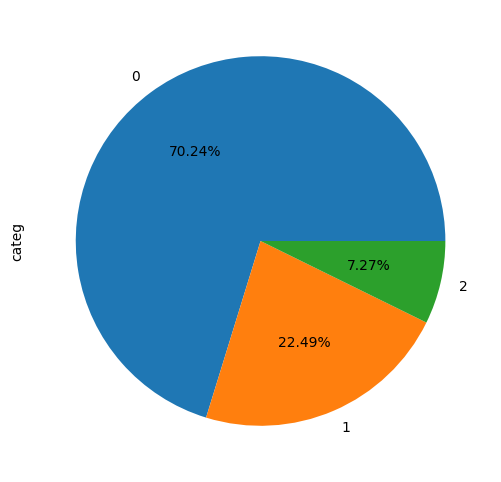

In [23]:
# grapfique de distribution de catégories
plt.figure(figsize=(13,7))
products['categ'] = pd.Categorical(products['categ']) #convertir la variable aux format correct
products["categ"].value_counts().plot(kind="pie", autopct='%1.2f%%', figsize=(9,6))
plt.savefig("Part1.Category distribution.png", bbox_inches='tight')
plt.show();


NOTE:
. nous avons 3 categories de produits : 0,1 et 3
. les 2/3 d'entre eux sont de catégoeies 0

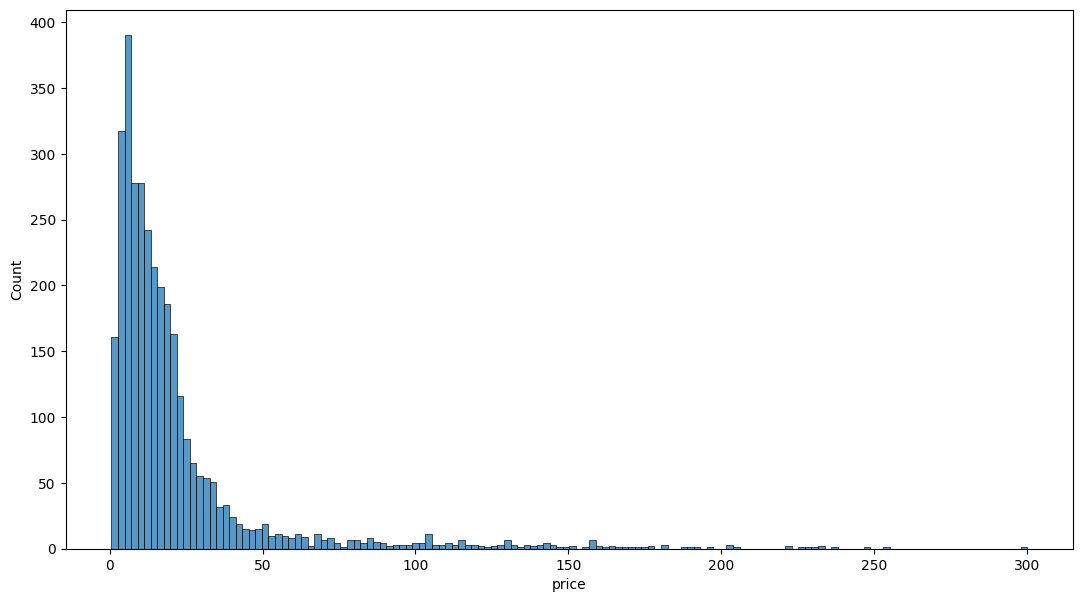

,count,mean,std,min,25%,50%,75%,max
price,3286.0,21.863597,29.849786,0.62,6.99,13.075,22.99,300.0


In [24]:
# Variable prix
plt.figure(figsize=(13,7))
sns.histplot(data =products, x="price" )
plt.show();

display(products.describe().T)

NOTE:


*   le prix moyen est de 21,86 euros
*   50% des prix sont inferieurs à 13,06  euros avec un prix maximum de 300 euros

*   Nous avons une distribution etalée à droite avec un écart type de 29,84 euros et certainement des valeurs abérantes






---------------------------------------------------------------------------------------------------- 



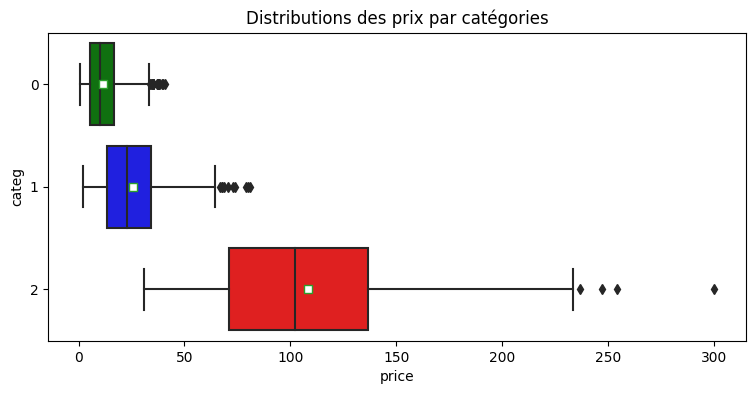

---------------------------------------------------------------------------------------------------- 



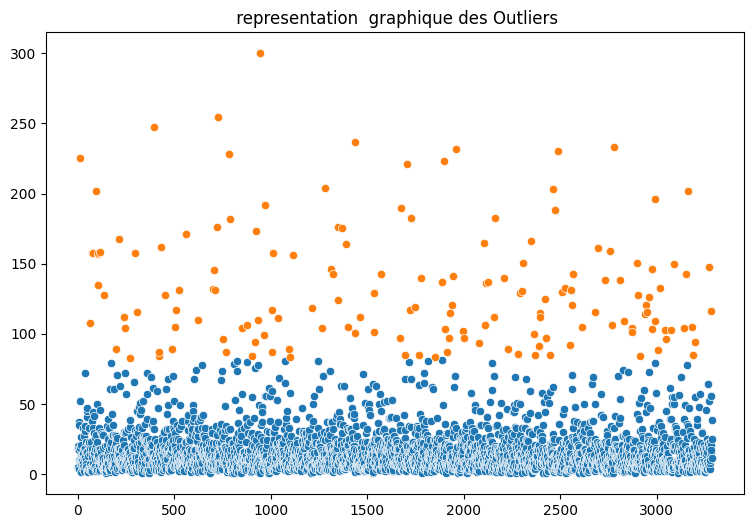

---------------------------------------------------------------------------------------------------- 



,id_prod,price,categ,zscore
10,2_228,225.17,2,6.810984
64,2_89,107.99,2,2.885327
73,2_225,157.99,2,4.560381
79,2_187,157.99,2,4.560381
95,2_128,201.74,2,6.026053
...,...,...,...,...
3183,2_142,105.24,2,2.793199
3187,2_99,84.99,2,2.114803
3195,2_238,93.92,2,2.413967
3270,2_123,147.99,2,4.225370


In [25]:
# detections des valeurs abérantes des outliers
print('-'*100, "\n")
plt.figure(figsize=(9,4))
palette = ['g','b','r']
meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(data=products, y='categ', x='price', orient='h', showmeans=True, palette=palette, meanprops=meanprops)
plt.title('Distributions des prix par catégories');
plt.show()

outliers = products.copy()
outliers["zscore"] = (outliers["price"] - outliers["price"].mean())/outliers["price"].std()
the_ok = outliers[(outliers["zscore"] <= 2) & (outliers["zscore"] >= -2)]
the_outliers = outliers[outliers["zscore"].abs() >2];
print('-'*100, "\n")
plt.figure(figsize=(9,6))
sns.scatterplot(x=the_ok["price"].index, y=the_ok["price"].values,)
sns.scatterplot(x=the_outliers["price"].index, y=the_outliers["price"].values)
plt.title(' representation  graphique des Outliers');
plt.savefig("Part1.representation  graphique des Outliers de prix.png", bbox_inches='tight')
plt.show()
print('-'*100, "\n")
display(the_outliers)

NOTE:
. le nbre d'outlier detecter est de : 157

**3. transactions.csv : exploration et nettoyages**

In [26]:
# chargement de donnees
transactions = pd.read_csv('transactions.csv')

In [27]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [28]:
#nbres de lignes et de colones
transactions.shape

(679532, 4)

In [29]:
#info
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


NOTE:
les donnees sur la transaction fornissent des informations sur les ventes: ils relient les produits et les clients en utulisant "id_prod"  et les cles etrangeres "client_id"


*   il ya 4 variables dans l'enssble de donnees chaque ligne represente une vente transaction a une date donnees
*   il ya 679532 transactions enregistrees

*   les donnees ne contiennent aucune valeurs manquante





In [30]:
# rechercher et suprimées les valeurs dupliqués dans le data
doublons = transactions[transactions.duplicated()]
doublons

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [31]:
print("Les doublons concernent les produits :", doublons["id_prod"].unique())
print('-'*100, "\n")
print("Les doublons concernent les clients :", doublons["client_id"].unique())
print('-'*100, "\n")
print("Les doublons concernent les dates :", doublons["date"].str.split(".", expand=True)[0].unique())
print('-'*100, "\n")
print("Les doublons concernent les sessions :", doublons["session_id"].str.split(".", expand=True)[0].unique())

Les doublons concernent les produits : ['T_0']
---------------------------------------------------------------------------------------------------- 

Les doublons concernent les clients : ['ct_1' 'ct_0']
---------------------------------------------------------------------------------------------------- 

Les doublons concernent les dates : ['test_2021-03-01 02:30:02']
---------------------------------------------------------------------------------------------------- 

Les doublons concernent les sessions : ['s_0']


NB:
les clients ct_1 et ct_0 sont des clients de test qui ont effectuées des transactions sur des produits de test (T_0) à une date de test (test_2021-03-01 02:30:02) lors d'une sessions de test S_0

In [32]:
#
transactions_test = transactions[transactions["id_prod"] =="T_0"]
print("Il y a", len(transactions_test), "tests de transactions")

Il y a 200 tests de transactions


In [33]:
#
transactions = transactions[transactions["id_prod"] !="T_0"]
transactions.shape

(679332, 4)

NB: apres le nettoyage , il ya 679 332 transaction dans le fichier

In [34]:
# separer la data, l'annees et period(time)

transactions.rename(columns={"date":"time"}, inplace=True)
transactions['date'] = pd.to_datetime(transactions['time']).dt.date
transactions['year'] = pd.to_datetime(transactions['time']).dt.year
transactions['date'] = pd.to_datetime(transactions['date'])#date convertion
transactions

,id_prod,time,session_id,client_id,date,year
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023
...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021


In [35]:
#Ajouter une nouvelle colone periode dans la table transactions
transactions['period'] = transactions['date'].dt.to_period("m")
transactions


,id_prod,time,session_id,client_id,date,year,period
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022-05
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022,2022-06
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021-06
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023-01
...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022,2022-01
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022,2022-03
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022,2022-12
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021,2021-07


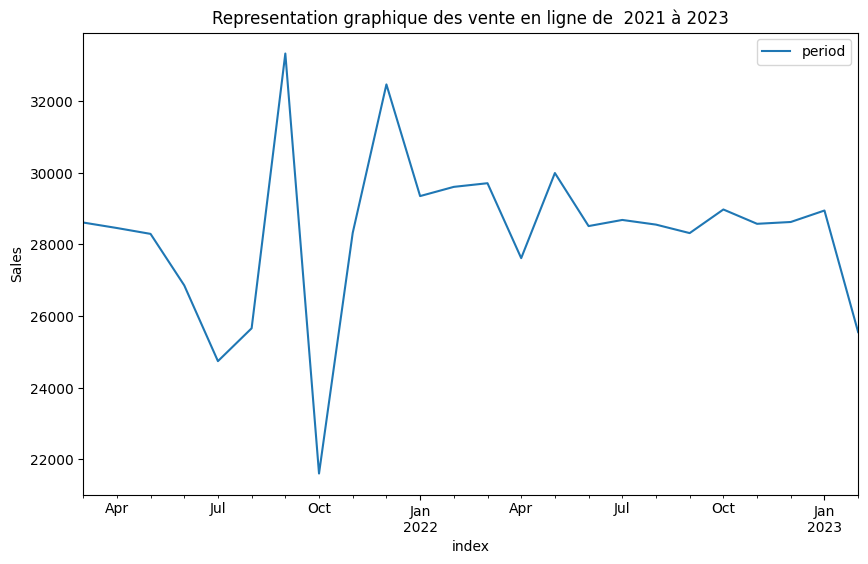

In [36]:
# Representation graphique des ventes en lignne de 2021 à 2023
transactions["period"].value_counts().reset_index().set_index('index').sort_values("index").plot( figsize=(10,6))
plt.ylabel("Sales")
plt.title("Representation graphique des vente en ligne de  2021 à 2023");
#plt.savefig("Part1.Representation graphique des vente en ligne de  2021 à 2023.png", bbox_inches='tight')

NB:
Il y a une baisse importante des ventes en octobre 2021

**4. Merge Lapage dataframes, exploration et nettoyages**

In [37]:
#merge des dataframes
lapage_df = transactions.merge(customers, how='left', on='client_id').merge(products, how='left', on='id_prod')
display(lapage_df.head())

,id_prod,time,session_id,client_id,date,year,period,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022-05,f,1986,37,4.18,0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022-02,m,1988,35,15.99,1
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022,2022-06,f,1968,55,7.99,0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021-06,m,2000,23,69.99,2
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023-01,m,1980,43,4.99,0


In [38]:
# exploration du resultat final
lapage_df.shape

(679332, 12)

In [39]:
# info
lapage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   time        679332 non-null  object        
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   date        679332 non-null  datetime64[ns]
 5   year        679332 non-null  int64         
 6   period      679332 non-null  period[M]     
 7   sex         679332 non-null  object        
 8   birth       679332 non-null  int64         
 9   age         679332 non-null  int64         
 10  price       679111 non-null  float64       
 11  categ       679111 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(5), period[M](1)
memory usage: 62.8+ MB


NB: la colone price et categ  a une valeurs manquante

In [40]:
# valeurs manquantes
check_nan(lapage_df, "price")
check_nan(lapage_df, "categ")

La colone price contient  221  valeurs manquantes
La colone categ contient  221  valeurs manquantes


In [42]:
# recherche
mask_nan = (lapage_df['price'].isnull()) | (lapage_df['categ'].isnull())
print("les valeurs manquantes concernent ces produits  :", lapage_df[mask_nan]["id_prod"].unique())

Missing values concern those products : ['0_2245']


In [43]:
# reherche de l'id '0_2245' dans  le date produit
products[products["id_prod"]=="0_2245" ]

,id_prod,price,categ




*   le produit  '0_2245'n'est pas repertorie dans le data produits

*   le produits  '0_2245' a ete vendu 221 fois
*   le produit  '0_2245' commence par 0_xxxx donc appartient à la catégories 0


*   l faut garder ce produit dans le résultat final et lui attribuer un prix moyen : celui de la catégorie 0



In [44]:
# nettoyer le resultat final
categ_0_mean = round(lapage_df[lapage_df["categ"]==0]["price"].mean(),2)#categ 0  price

lapage_df.loc[lapage_df["id_prod"]=="0_2245", "price"] = categ_0_mean#categ 0  price remplacer

lapage_df.loc[lapage_df["id_prod"]=="0_2245", "categ"] = 0#categ 0  categ

lapage_df[lapage_df["id_prod"]=="0_2245"].head()#final 

,id_prod,time,session_id,client_id,date,year,period,sex,birth,age,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022-09-23,2022,2022-09,m,1940,83,10.64,0
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022-07-23,2022,2022-07,f,1963,60,10.64,0
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022-12-03,2022,2022-12,m,1978,45,10.64,0
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021-08-16,2021,2021-08,m,1991,32,10.64,0
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022-07-16,2022,2022-07,m,1973,50,10.64,0


In [45]:
lapage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   time        679332 non-null  object        
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   date        679332 non-null  datetime64[ns]
 5   year        679332 non-null  int64         
 6   period      679332 non-null  period[M]     
 7   sex         679332 non-null  object        
 8   birth       679332 non-null  int64         
 9   age         679332 non-null  int64         
 10  price       679332 non-null  float64       
 11  categ       679332 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(5), period[M](1)
memory usage: 62.8+ MB


**Conclusion partie 1**

Il y a 679 332 transactions dans le dataframe final :
→ Le produit test T_0 a été supprimé (200 lignes)

→ Le prix manquant du produit 0_2245 a été remplacé par le prix moyen des produits de la catégorie 0 (221 lignes)

→ 157 valeurs aberrantes ont été détectées sur le prix

In [46]:
lapage_df

,id_prod,time,session_id,client_id,date,year,period,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022-05,f,1986,37,4.18,0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022-02,m,1988,35,15.99,1
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022,2022-06,f,1968,55,7.99,0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021-06,m,2000,23,69.99,2
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023-01,m,1980,43,4.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022,2022-01,f,1951,72,12.99,0
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022,2022-03,f,1977,46,10.99,1
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022,2022-12,f,1988,35,12.99,0
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021,2021-07,m,1986,37,4.98,0
